# Clustering dengan K-Means Algoritma 

Kelompok 9 - Halcyon DS 28 
1. Jesslyn Jane 
2. Aditya Ridwan 
3. Lhutfia Ichsan 
4. Ann Sinaga 
5. Mustiadi Zakki 
6. M Triargi 

#Stage 1 (EDA, Insight, Visualization)

## Exploratory Data Analysis

### 1. Descriptive Statistics

#### Kode nomor 1

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1hXRcdO_ZePzOTHX0RmFaNBHDKoU9_6PE')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
# Check Missing Value 
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [4]:
# Column names: remove white spaces and convert to lower case
df.columns= df.columns.str.strip().str.lower()
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [5]:
# Check Duplicate 
df.duplicated().sum()

0

In [6]:
# Check Value for each Columns -- Check Invalid Data 

for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

member_no=
[    1     2     3 ... 62986 62987 62988]

ffp_date=
['1/1/2005' '1/1/2006' '1/1/2007' ... '9/9/2010' '9/9/2011' '9/9/2012']

first_flight_date=
['1/1/2005' '1/1/2006' '1/1/2008' ... '9/9/2011' '9/9/2012' '9/9/2013']

gender=
['Female' 'Male' nan]

ffp_tier=
[4 5 6]

work_city=
['#NAME?' '*' '**' ... '．' 'ＴＷ' nan]

work_province=
['#NAME?' '*' '**' ... '．' 'ＴＷ' nan]

work_country=
['AA' 'AB' 'AE' 'AN' 'AR' 'AS' 'AT' 'AU' 'AZ' 'BB' 'BD' 'BE' 'BG' 'BI'
 'BN' 'BR' 'BS' 'BZ' 'CA' 'CC' 'CD' 'CH' 'CL' 'CM' 'CN' 'CR' 'CY' 'DE'
 'DK' 'EC' 'EG' 'ES' 'FA' 'FI' 'FL' 'FO' 'FR' 'GB' 'GE' 'GH' 'GL' 'GN'
 'GT' 'GU' 'HK' 'HN' 'HU' 'IA' 'ID' 'IE' 'IL' 'IN' 'IR' 'IT' 'JP' 'KA'
 'KE' 'KH' 'KO' 'KR' 'KZ' 'LA' 'LB' 'MA' 'MN' 'MO' 'MS' 'MV' 'MX' 'MY'
 'MZ' 'NE' 'NG' 'NI' 'NL' 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PN' 'PP'
 'PR' 'PS' 'PT' 'RE' 'RO' 'RU' 'SA' 'SE' 'SG' 'SI' 'SK' 'SN' 'SU' 'SW'
 'TH' 'TK' 'TR' 'TW' 'UA' 'UK' 'US' 'UV' 'UY' 'UZ' 'VN' 'VT' 'YE' 'ZA'
 'ZW' 'cn' '中' '北' '沈' '芬' nan]

age=

In [7]:
#categorized each column based on num or cat data type, column that has only 1 unique value (Z_CostContact and Z_Revenue) is not categorized
cats = ['gender', 'work_city', 'work_province', 'work_country']
cats_date = ['ffp_date','first_flight_date','load_time','last_flight_date']
num = ['member_no','ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']

In [8]:
df[num].describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [9]:
df[cats].describe()

,gender,work_city,work_province,work_country
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [10]:
df[['work_province','work_city']].value_counts()

work_province  work_city     
guangdong      guangzhou         9223
beijing        beijing           7002
shanghai       shanghai          4571
guangdong      shenzhen          3497
liaoning       dalian            1928
                                 ... 
PARIS          NOISY LE GRAND       1
PAYATHAI       SAMSENNAI            1
PEANG          B'WORTH              1
PENANG         B MERTAJAM           1
ＴＷ             ＴＷ                   1
Length: 3876, dtype: int64

#### A. Kesimpulan : Pastikan setiap kolom dataset yang tepat, tidak ada data kosong, bebas dari duplikate, dan berada di range value yang tepat

- Terdapat kolom dengan tipe data yang salah adalah 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', LAST_FLIGHT_DATE', dimana data tersebut seharusnya memiliki tipe date bukan object.
- Kemudian terdapat kolom dengan nilai kosong, yaitu gender, work_city, work_province, work_country, age, sum_yr_1, sum_yr_2
- Kemudian terdapat kolom dengan nilai summary yang agak aneh yaitu kolom age dengan nilai max 110. 

## Visualization

In [ ]:
df['work_country'].value_counts()

CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: work_country, Length: 118, dtype: int64

In [ ]:
cats = ['gender', 'work_city', 'work_province', 'work_country']
num = ['member_no','ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']
num_1 = ['member_no','ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum']
num_2 =['last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']

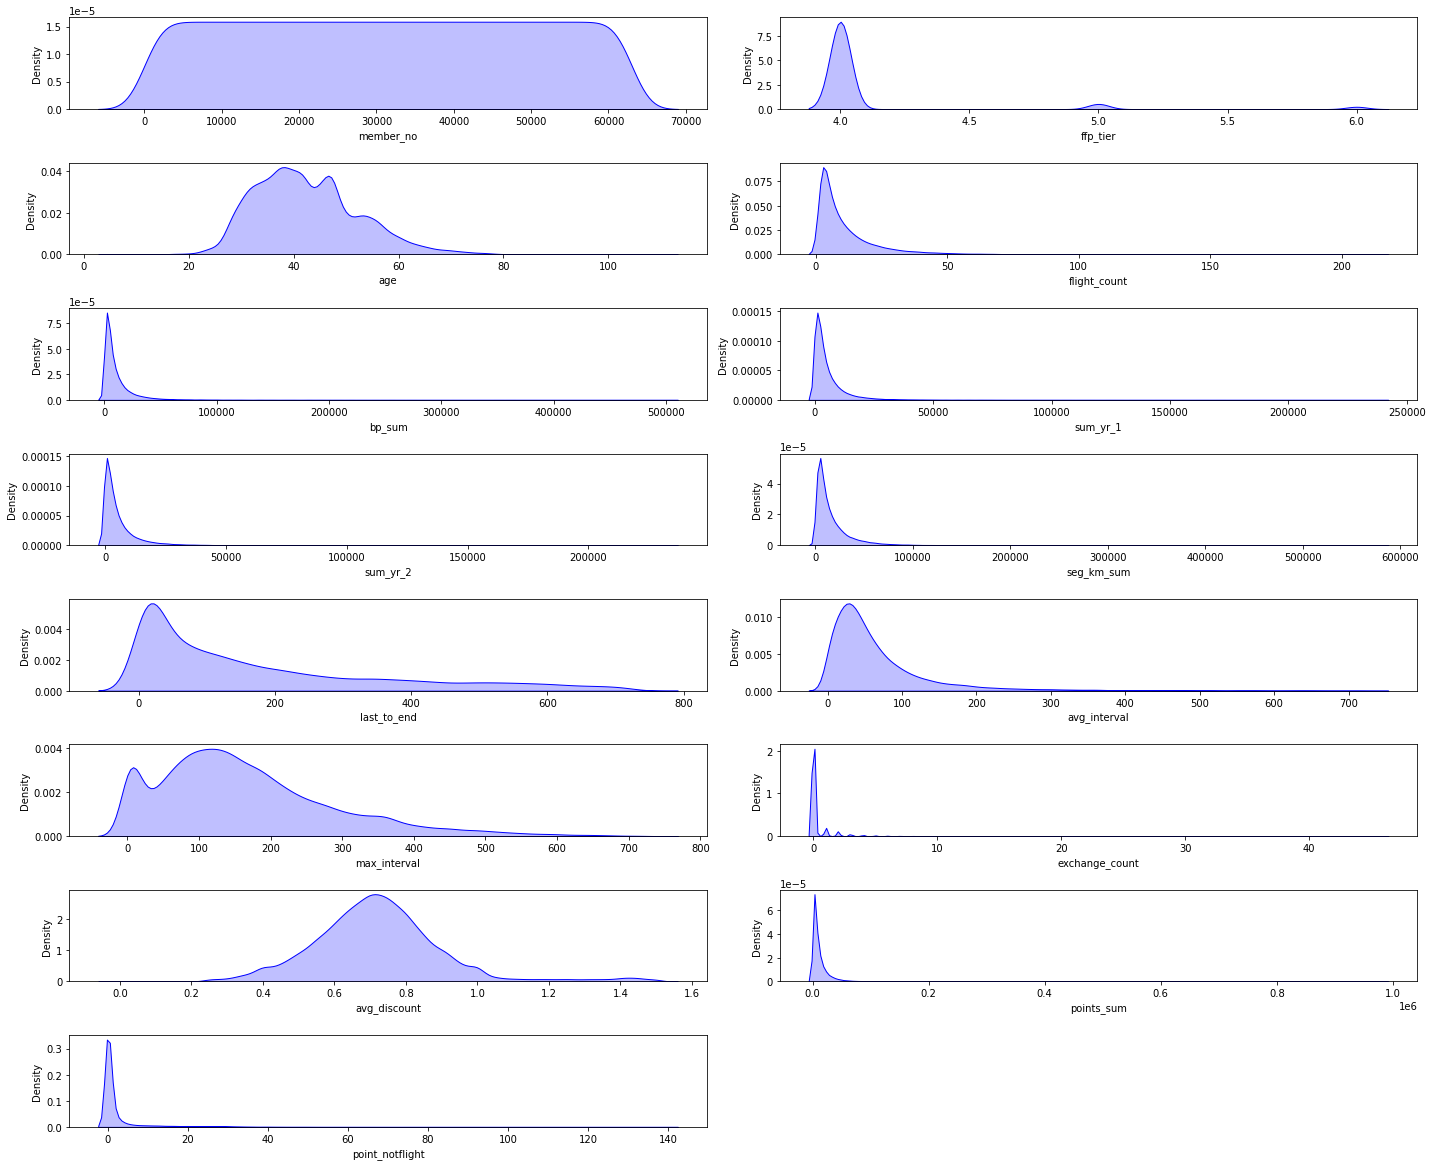

In [ ]:
#numericals
plt.figure(figsize=(20,30))
for i in range(0, len(num)):
    plt.subplot(len(num), 2, i+1)
    sns.kdeplot(df[num[i]], color='blue', fill=True)
    plt.tight_layout()

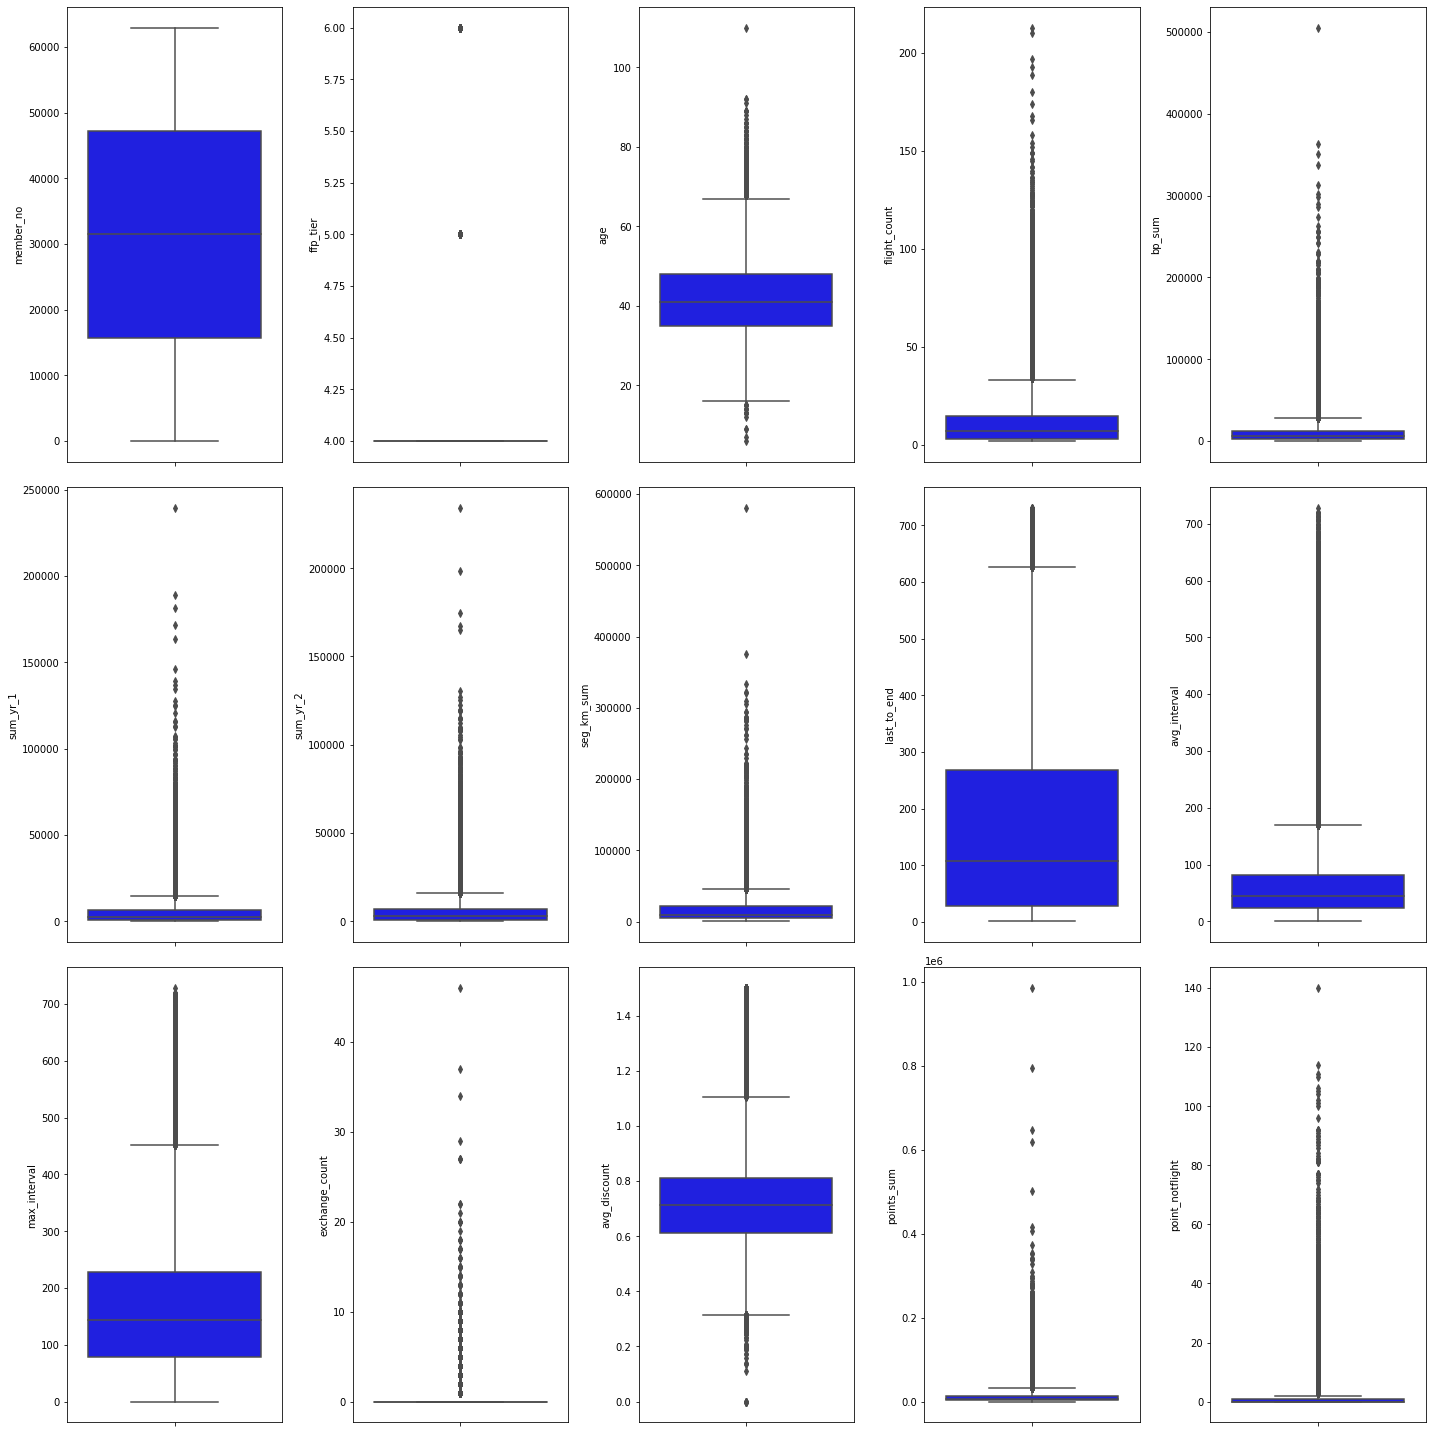

In [ ]:
plt.figure(figsize=(20,100))
for i in range(0, len(num)):
    plt.subplot(len(num), 5, i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

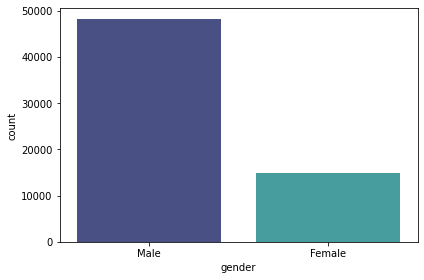

In [ ]:
#categorical feature
sns.countplot(x = df['gender'], orient='v', palette='mako')
plt.tight_layout()

### 2. Univariate Analysis

**Hasil Observasi**

A. CATS

- Kolom work_city, work_province, work_country memiliki jumlah unique value yang sangat banyak. Perlu dilakukan feature encoding di tahap pre-processing.


B. NUMS
- seluruh kolom numerical memiliki pola positively skewed, kecuali kolom avg_discount yang memiliki kecenderungan mendekati pola distribusi normal.
- seluruh kolom numerical memiliki outliers, kecuali kolom member_no dikarenakan kolom ini terdiri dari unique ID Member.

Untuk distribusi positive skew, di proses data pre-processing akan dilakukan log transformation. 

###3. Multivariate Analysis

In [ ]:
#find correlation between variables
df_for_corr = pd.read_csv('https://drive.google.com/uc?export=download&id=1hXRcdO_ZePzOTHX0RmFaNBHDKoU9_6PE')
df_for_corr.corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.005910,0.001259,-0.000276,0.000063,-0.002529,0.001185,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
FFP_TIER,-0.005910,1.000000,0.078654,0.582447,0.581085,0.463122,0.611385,0.522350,-0.206313,-0.144928,-0.127641,0.342355,0.248845,0.559249,0.192803
AGE,0.001259,0.078654,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,-0.000276,0.582447,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.581085,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002529,0.463122,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.001185,0.611385,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,-0.000032,0.522350,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.206313,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.144928,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967


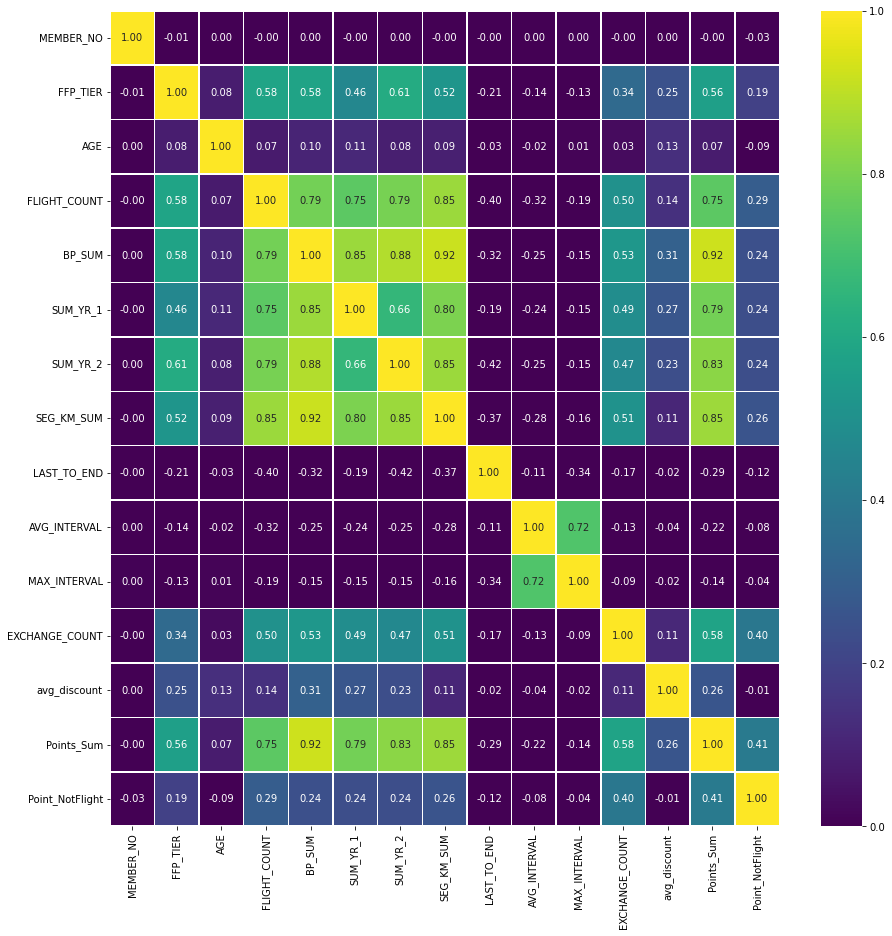

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')

In [ ]:
num = ['member_no','ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']

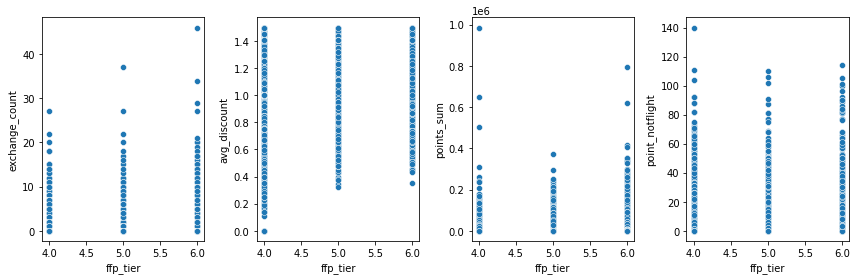

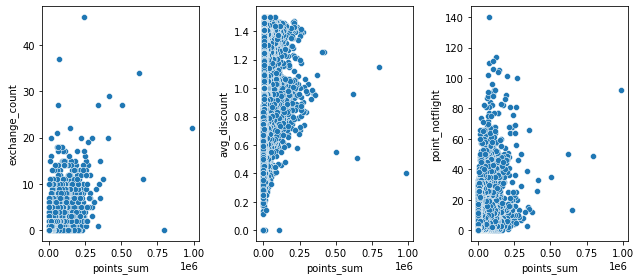

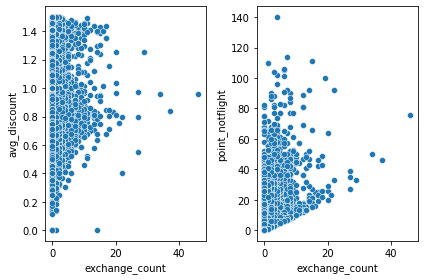

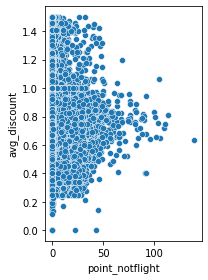

In [ ]:
# plot feature cost terhadap feature numerik lain
s1 = ['exchange_count','avg_discount','points_sum','point_notflight']
fig = plt.figure(figsize=(12, 4))
for i in range(0, len(s1)): 
    ax = fig.add_subplot(1, 4, i+1) 
    sns.scatterplot(ax=ax, data=df, x='ffp_tier', y=s1[i], palette='mako')
    plt.tight_layout() 

s2 = ['exchange_count','avg_discount','point_notflight']
fig = plt.figure(figsize=(9, 4))
for i in range(0, len(s2)): 
    ax = fig.add_subplot(1, 3, i+1) 
    sns.scatterplot(ax=ax, data=df, x='points_sum', y=s2[i], palette='mako')
    plt.tight_layout() 

s3 = ['avg_discount','point_notflight']
fig = plt.figure(figsize=(6, 4))
for i in range(0, len(s3)): 
    ax = fig.add_subplot(1, 2, i+1) 
    sns.scatterplot(ax=ax, data=df, x='exchange_count', y=s3[i], palette='mako')
    plt.tight_layout() 

fig = plt.figure(figsize=(3, 4))
sns.scatterplot(data=df, x='point_notflight', y='avg_discount', palette='mako')
plt.tight_layout() 

**Hasil Observasi**

- Terdapat beberapa kolom yang memiliki nilai korelasi >0.7 (redundan):
  - flight_count
  - bp_sum
  - sum_yr_1
  - sum_yr_2
  - seg_km_sum
- Terdapat beberapa kolom yang menarik:
  - ffp_tier dengan points_sum(0.56)
  - points_sum dengan exchange_count(0.58)
  - points_sum dengan point_notflight(0.41)
  - exchange_count dengan point_notflight(0.40)

## Business Insights & Recommendations

### Business Insights

In [ ]:
df['point_notflight'].value_counts()

0      42480
1       6381
2       2838
3       1661
4       1091
       ...  
76         1
83         1
86         1
101        1
111        1
Name: point_notflight, Length: 99, dtype: int64

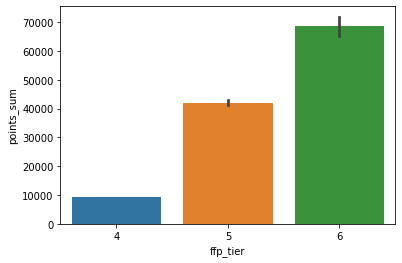

In [ ]:
#ffp_tier vs points_sum
sns.barplot(x='ffp_tier',y='points_sum', data = df)

#Stage 2 (Data PreProcessing)

In [11]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import warnings
#warnings.filterwarnings('ignore')

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Data Cleansing & Feature Engineering

### A. Handle Missing Values

In [12]:
# check missing value

df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [13]:
#calculating the percentage of null rows
percent_null = (df['work_province'].isna().sum()) / len(df.index) * 100
percent_null

5.156537753222836

#####**Kesimpulan**

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom work_province sebanyak 3248 baris dengan persentase sebesar 5.16% dari keseluruhan data, yang berarti tergolong jauh di bawah batas aman penghapusan data (10%). Sehingga keputusan yang kami lakukan terhadap missing value tersebut, yaitu dengan menghapus keseluruhan baris pada kolom Income yang memiliki nilai null (kosong).

In [14]:
#deleting rows with missing value
df = df.drop(columns=['work_province']).dropna()

In [15]:
df.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

### B. Handle Incorrect Value

In [16]:
df['last_flight_date'].describe()

count         59701
unique          731
top       3/31/2014
freq            930
Name: last_flight_date, dtype: object

In [17]:
#check any duplicated
df[df['last_flight_date'].str.contains('2014/2/29')]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_country,age,load_time,flight_count,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,CN,46.0,3/31/2014,53,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,CN,70.0,3/31/2014,31,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,CN,39.0,3/31/2014,49,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,CN,40.0,3/31/2014,80,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,CN,50.0,3/31/2014,27,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,CN,23.0,3/31/2014,3,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,CN,37.0,3/31/2014,2,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,CN,34.0,3/31/2014,2,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,CN,42.0,3/31/2014,2,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [18]:
#find the percentage of incorrect value
percent = (df[df['last_flight_date'].str.contains('2014/2/29')]['last_flight_date'].count()/len(df))*100
percent

0.6800556104587863

In [19]:
# drop the column
df.drop(df[df.last_flight_date.str.contains('2014/2/29')].index, inplace = True)

#####**Kesimpulan**
Berdasarkan hasil pengecekan, terdapat 413 baris yang mengalami kesalahan input di kolom last_flight_date dengan total 0.6%, sehingga kami memutuskan untuk drop baris tersebut.

### C. Handle Data Type

In [20]:
for col in cats_date:
  df[col] = pd.to_datetime(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59295 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          59295 non-null  int64         
 1   ffp_date           59295 non-null  datetime64[ns]
 2   first_flight_date  59295 non-null  datetime64[ns]
 3   gender             59295 non-null  object        
 4   ffp_tier           59295 non-null  int64         
 5   work_city          59295 non-null  object        
 6   work_country       59295 non-null  object        
 7   age                59295 non-null  float64       
 8   load_time          59295 non-null  datetime64[ns]
 9   flight_count       59295 non-null  int64         
 10  bp_sum             59295 non-null  int64         
 11  sum_yr_1           59295 non-null  float64       
 12  sum_yr_2           59295 non-null  float64       
 13  seg_km_sum         59295 non-null  int64         
 14  last_f

In [22]:
# save the clean data to df_new
df_new = df.copy()

### D. Handle Outliers

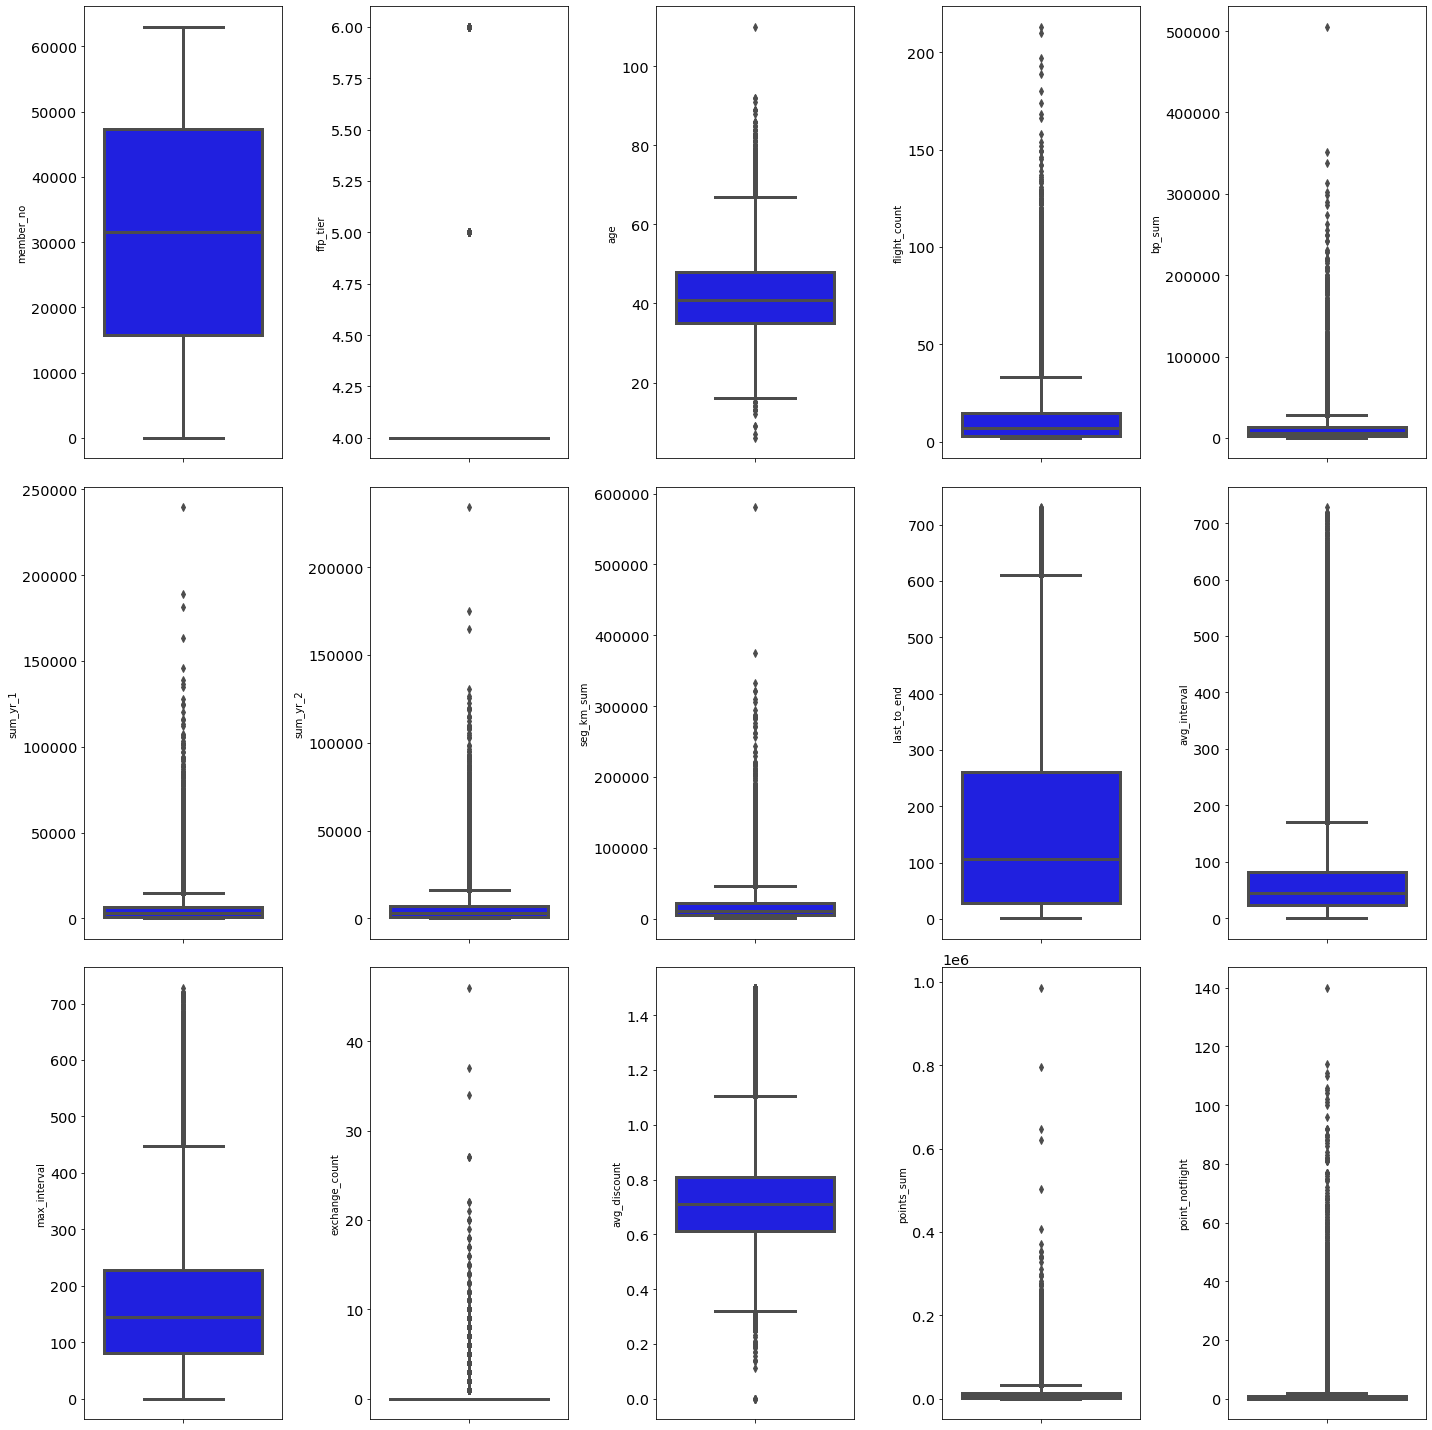

In [23]:
plt.figure(figsize=(20,100))
for i in range(0, len(num)):
    plt.subplot(len(num), 5, i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

####**Kesimpulan**
Berdasarkan grafik yang telah ditampilkan di atas, terlihat bahwa adanya outliers semua fitur numerikal, kecuali member_no dan ffp_tier. Sehingga, kami melakukan perbaikan pada fitur tersebut dengan menggunakan metode Z-score dan juga IQR untuk meminimalisir jumlah outliers yang terkandung dalam dataset.

#### Remove Outliers berdasarkan Z-score

In [24]:
df_z = df_new.copy()

outliers =['age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']

print(f'jumlah baris sebelum memfilter outlier: {len(df_z)}')

filtered_enteries = np.array([True] * len (df_z))

for col in outliers:
    zscore = abs(stats.zscore(df_z[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df_z = df_z[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df_z)}')

jumlah baris sebelum memfilter outlier: 59295
jumlah baris sesudah memfilter outlier: 51578


#### Remove Outliers berdasarkan IQR

In [25]:
df_iqr = df_new.copy()

outliers =['age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']

print(f'Jumlah baris sebelum filtering outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))

for i in outliers:
    Q1 = df_iqr[i].quantile(0.25)
    Q3 = df_iqr[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    filtered_entries = ((df_iqr[i] >= low_limit) & (df_iqr[i] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah filtering outlier: {len(df_iqr)}')

Jumlah baris sebelum filtering outlier: 59295
Jumlah baris setelah filtering outlier: 33736


####**Kesimpulan**
Berdasarkan hasil perhitungan menggunakan Z-score dan juga IQR, dapat diketahui bahwa jumlah baris yang dihapus berdasarkan IQR jauh lebih banyak dibandingkan dengan Z-score, yaitu sekitar >40% dari total baris data yang dihapus. Maka dari itu, kami memutuskan untuk memilih metode Z-score untuk melakukan penghapusan pada baris outliers.

Setelah itu, kami melakukan plotting boxplot untuk melihat kembali persebaran outliers pada masing-masing fitur.

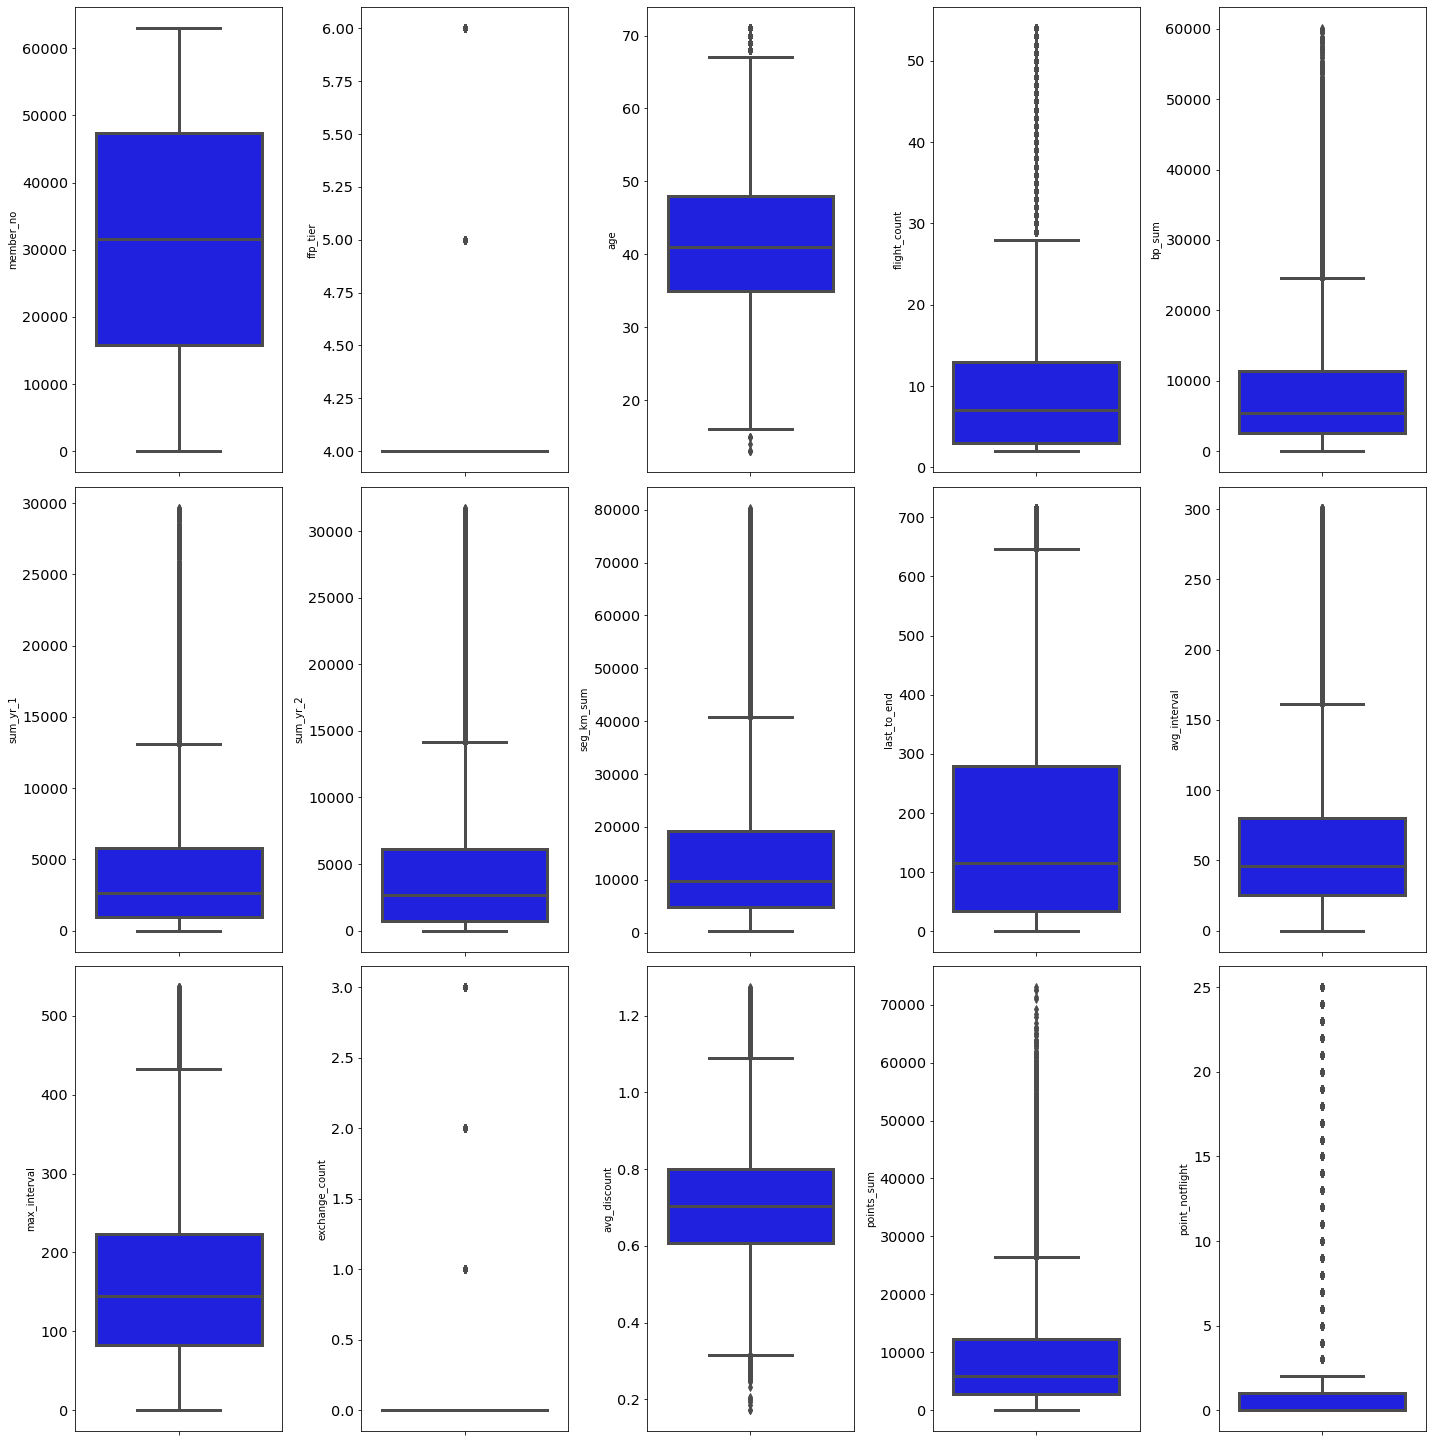

In [26]:
plt.figure(figsize=(20,100))
for i in range(0, len(num)):
    plt.subplot(len(num), 5, i+1)
    sns.boxplot(y=df_z[num[i]], color='blue', orient='v')
    plt.tight_layout()

### E. Feature Engineering

In [27]:
df_new['length_relation'] = ((df_new['load_time']- df_new['ffp_date'])/np.timedelta64(1, 'M'))
df_new.head(2)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_country,age,load_time,flight_count,...,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,length_relation
0,54993,2006-11-02,2008-12-24,Male,6,.,CN,31.0,2014-03-31,210,...,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50,88.905316
2,55106,2007-02-01,2007-08-30,Male,6,.,CN,40.0,2014-03-31,135,...,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,85.915522


### F. Feature Selection

Dalam pemodelan clustering ini digunakan empat feature diantaranya : 
- LAST_TO_END (Recency), waktu transaksi terakhir pelanggan 
- FLIGHT_COUNT (Frequency), total transaksi yang dilakukan oleh pelanggan 
- SEG_KM_SUM (Monetary), total KM 
- Avg_Discount (coefficient), rata-rata discount yang didapatkan oleh pelanggan 

dan satu feature tambahan yang diperoleh dari : 
- (FFP_DATE - LOAD_TIME) Length relation, jarak waktu registrasi dan data didapatkan 

In [28]:
df_selection = df_new.copy()

In [29]:
df_selection = df_selection[['length_relation', 'last_to_end','flight_count','seg_km_sum','avg_discount']]
df_selection.sample(5)

,length_relation,last_to_end,flight_count,seg_km_sum,avg_discount
23914,15.934619,17,6,14624,0.688260
41071,16.558862,503,3,4935,0.895765
29469,21.979917,147,9,10940,0.701601
55076,12.879115,375,3,3273,0.608723
46588,74.909136,215,5,6140,0.543824


### G. Feature Transformation

#### Normalization

In [30]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['length_relation', 'last_to_end', 'flight_count', 'seg_km_sum']

for col in norm_col:
    df_selection[col + '_norm'] = MinMaxScaler().fit_transform(df_selection[col].values.reshape(len(df_selection), 1))
  

Normalisasi dilakukan karena kolom length_relation, last_to_end, flight_count, seg_km_sum memiliki rentang nilai yang berbeda jauh dengan avg_discount.

#### Standardization

In [31]:
# Standarisation
df_selection['avg_discount_std'] = StandardScaler().fit_transform(df_selection['avg_discount'].values.reshape(len(df_selection), 1))

In [32]:
df_selection.head()

,length_relation,last_to_end,flight_count,seg_km_sum,avg_discount,length_relation_norm,last_to_end_norm,flight_count_norm,seg_km_sum_norm,avg_discount_std
0,88.905316,1,210,580717,0.961639,0.762044,0.000000,0.985782,1.000000,1.303969
2,85.915522,11,135,283712,1.254676,0.732422,0.013699,0.630332,0.488230,2.894144
3,67.253948,97,23,281336,1.090870,0.547526,0.131507,0.099526,0.484136,2.005244
4,59.664469,5,152,309928,0.970658,0.472331,0.005479,0.710900,0.533403,1.352910
5,73.627795,79,92,294585,0.967692,0.610677,0.106849,0.426540,0.506966,1.336819





Standardisasi pada kolom avg_discount digunakan untuk menskalakan ulang data sehingga memberikan grafik distribusi normal.



In [33]:
# Filtering kolom std
df_select_std = df_selection.copy()
df_select_std = df_select_std[['length_relation_norm', 'last_to_end_norm', 
                               'flight_count_norm', 'seg_km_sum_norm',
                               'avg_discount_std']]

In [34]:
df_select_std.head(3)

,length_relation_norm,last_to_end_norm,flight_count_norm,seg_km_sum_norm,avg_discount_std
0,0.762044,0.000000,0.985782,1.000000,1.303969
2,0.732422,0.013699,0.630332,0.488230,2.894144
3,0.547526,0.131507,0.099526,0.484136,2.005244


# Stage 3 (Clustering)

## Inertia

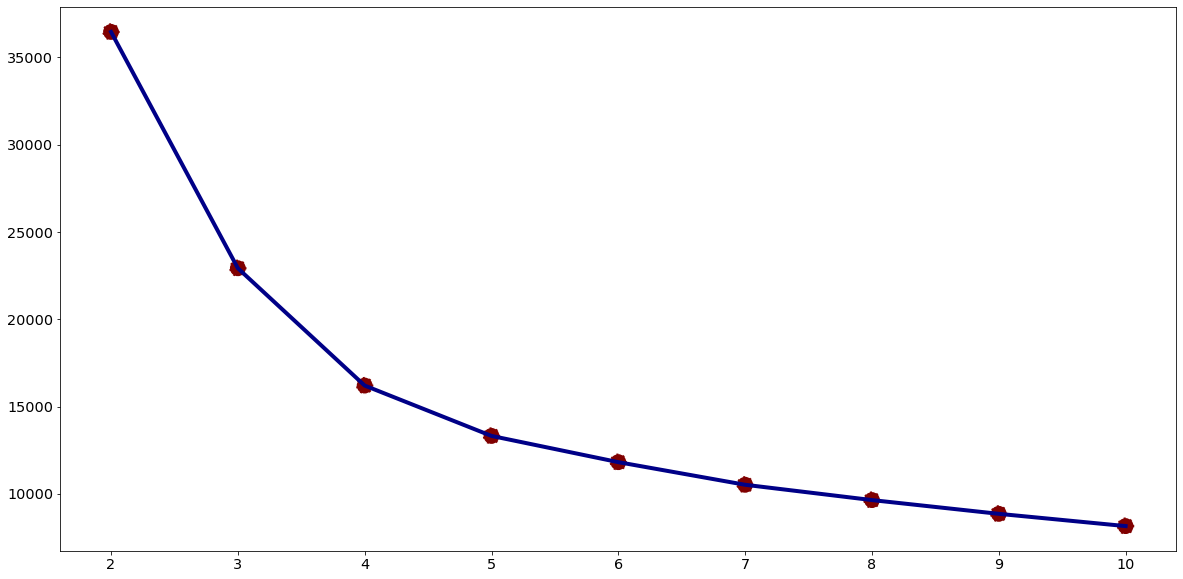

In [35]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [36]:
#Cek persentase claster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) *100

0    37.124929
1    29.312455
2    17.799318
3    11.278708
4    10.963123
5     8.326986
6     8.168438
7     7.926253
8          NaN
dtype: float64

Berdasarkan elbow method di atas, nilai K value yang optimal adalah 3.

## Silhouette Score

In [41]:
from sklearn.metrics import silhouette_score

scori = [] 
for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_select_std)
    preds = clusterer.predict(df_select_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_select_std, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))
    scori.append(score)

For n_clusters = 2. The average silhouette_score is : 0.4030819963186168
For n_clusters = 3. The average silhouette_score is : 0.40775613107788944
For n_clusters = 4. The average silhouette_score is : 0.35414048297152595
For n_clusters = 5. The average silhouette_score is : 0.3070357744938327
For n_clusters = 6. The average silhouette_score is : 0.2676165531645029
For n_clusters = 7. The average silhouette_score is : 0.2791467870455074


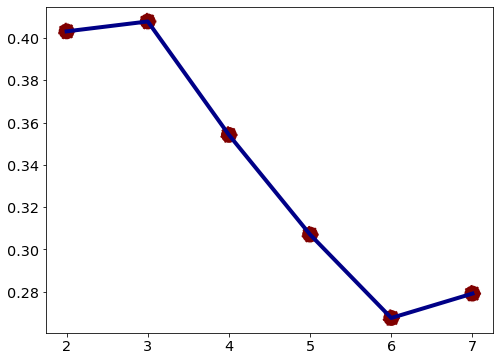

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,8), y=scori, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,8), y=scori, s=300, color='#800000',  linestyle='--')

In [ ]:
#Cek persentase claster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) *100

## Clustering

In [44]:
# Create cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_select_std.values)

KMeans(n_clusters=3, random_state=0)

In [45]:
# Assign cluster to df_new
clusters = kmeans.labels_
df_new['clusters'] = clusters
df_new.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_country,age,load_time,flight_count,...,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,length_relation,clusters
16778,60489,2012-11-09,2012-11-09,Male,4,puyang,CN,42.0,2014-03-31,14,...,2014-03-27,5,38.769231,127,0,0.850773,13415,0,16.657426,1
21587,12007,2008-06-27,2008-06-28,Male,4,guangzhou,CN,55.0,2014-03-31,23,...,2014-02-25,36,31.500000,142,0,0.775589,11053,0,69.093821,1
38876,21954,2009-07-27,2009-07-27,Female,4,xianggang,CN,64.0,2014-03-31,10,...,2014-03-28,4,66.000000,255,0,0.410168,3390,0,56.116142,0
30410,39986,2012-10-12,2012-10-12,Male,4,changchunshi,CN,36.0,2014-03-31,6,...,2013-06-24,282,51.000000,242,0,0.702976,5314,0,17.577363,1
10046,31326,2009-12-04,2012-10-20,Male,4,wulumuqi,CN,39.0,2014-03-31,11,...,2014-03-25,7,52.200000,261,0,0.746234,18195,0,51.845007,1


## Dimensionality Reduction

In [46]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,1.327691,0.551234
1,2.910950,0.428296
2,2.012060,0.188627
3,1.364975,0.250054
4,1.348819,0.300544


In [47]:
df_pca['clusters'] = clusters
df_pca.head(2)

,PC 1,PC 2,clusters
0,1.327691,0.551234,1
1,2.910950,0.428296,2


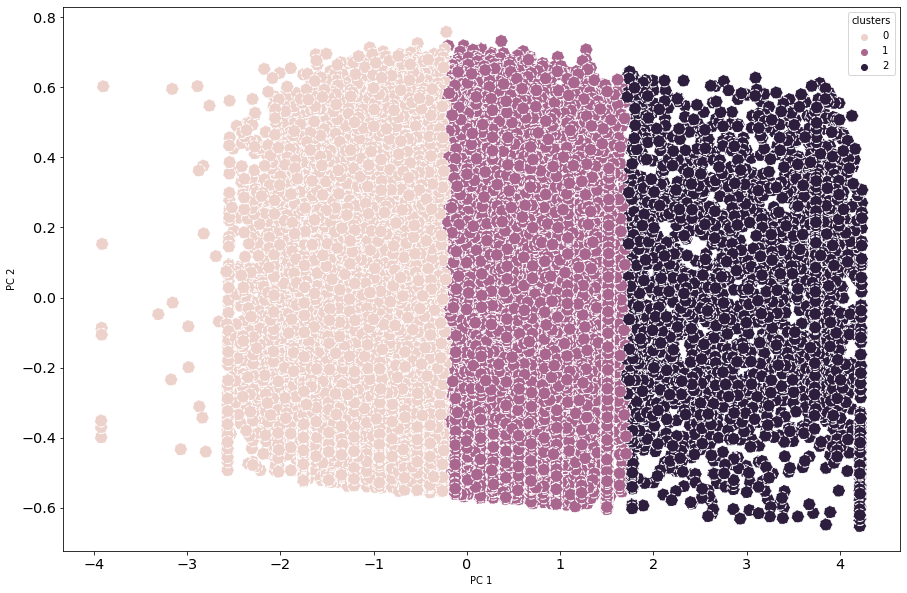

In [48]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

# Interpretasi Cluster

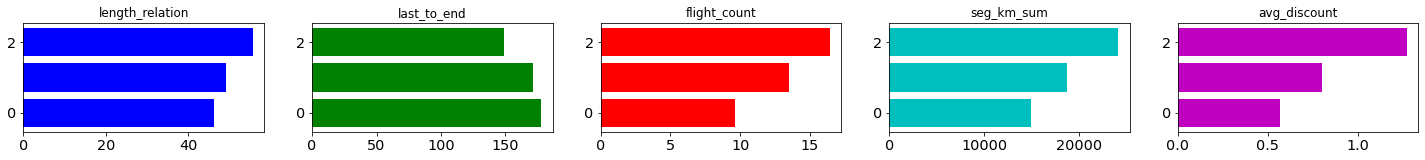

In [49]:
LRFM=['length_relation', 'last_to_end','flight_count','seg_km_sum','avg_discount']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = df_new.groupby('clusters')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [50]:
df_new[['length_relation', 'last_to_end','flight_count','seg_km_sum','avg_discount','clusters']].groupby('clusters').median()

,length_relation,last_to_end,flight_count,seg_km_sum,avg_discount
clusters,,,,,
0,38.538779,114.0,6.0,9182.5,0.590958
1,42.349946,102.0,8.0,10919.0,0.782403
2,52.600669,76.0,9.0,13083.0,1.278321


## Customer Segmentation Based on Clusters

Cluster 0 (low class customer):
- Dapat dilihat dari data yang sudah ada bahwa member pada cluster 0 memiliki durasi membership selama 38 bulan yang memiliki jarak penerbangan sebesar 9.182 kilometer yang memiliki rata rata penerbangan diatas 6 kali

Cluster 1 (middle class customer):
- Dapat dilihat dari data yang suda ada bahwa member pada cluster 1 memiliki durasi berlangganan selama 42 bulan dan memiliki jarak penerbangan sebesar 10.919 kilometer yang memeliki rata rata penerbangan diatas 8 kali

Cluster 2 (High Class Customer):
- Dapat dilihat dari data yang sudah ada bahwa member pada cluster 2 memiliki durasi berlangganan selama 52 bulan dan memiliki jarak penerbangan yang jauh sebesar 13.083 kilometer yang memiliki rata rata penerbangan diatas 9 kali

## Recommenddation

1. Mempertahankan **high class customer** dengan memberikan fasilitas first class dan airpot lounge agar dapat meningkatkan kepuasan konsumen. Selain itu juga menerapkan konsep Membership, dimana dalam hal ini pelanggan diasumsikan adalah mereka yang menggunakan layanan untuk jarak tempuh yang cenderung jauh dengan frekuensi yang tinggi sehingga mereka mempertimbangkan kenyamanan dalam mobilitas mereka. Konsep membership menawarkan pilihan biaya langganan dengan perhitungan yang matang untuk layanan diluar biaya tiket penerbangan. Ini sudah termasuk layanan snack, makan, dan kenyamanan kursi dan fasilitas. 

2. Memberikan promo yang menarik pada **middle class dan low class** customer agar dapat meningkatkan transaksi pembelian tiket pesawat dan memberi reedem point yang bertujuan untuk penukaran tiket pesawat gratis. Selain itu juga menawarkan Konsep LCC (Lost Cost Carrier), dimana dalam hal ini pelanggan diasumsikan adalah mereka yang menggunakan layanan untuk jarak tempuh yang cenderung dekat, sehingga tidak terlalu membutuhkan layanan ekstra (kenyamanan). Dapat memisahkan harga tiket dengan harga layanan spt snack, makan, atau pilihan kenyamanan kursi. Konsep ini dapat menjangkau lebih luas segmen pasar bawah. Juga tidak membatasi jika terdapat pelanggan pada segmen low dan medium class tetap dapat menikmati layanan yang lebih baik dari sekedar harga tiket penerbangan.